In [1]:
import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras import backend as K

Using TensorFlow backend.


In [2]:
def plot_2d_landmarks(img, true, pred):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(img.reshape((80,120,3)))
    ax.autoscale(False)
    ax.plot(pred[:,0], pred[:,1], '+w')
    plt.plot(true[:,0], true[:,1], '.r')
    ax.axis('off')
    plt.show()
    
def p_norm_loss(y_true, y_pred):
    return K.mean(K.pow(y_pred - y_true, 4), axis=-1)


In [3]:
landmark_dim = 2
# Load data
with open('all_data.pkl', 'rb') as f:
    images_train, images_test, ldmks_2d_train, ldmks_2d_test, ldmks_3d_train, ldmks_3d_test, head_pose_train, head_pose_test = pickle.load(f)

num_samples = images_test.shape[0]

In [5]:
# Load the saved model
# model = load_model('landmark_cnn.h5', custom_objects={'p_norm_loss': p_norm_loss})
# Load the saved model
model = load_model('landmark_cnn_v6_ploss_retarded.h5', custom_objects={'p_norm_loss': p_norm_loss}) # 4-norm

model2 = load_model('landmark_cnn_v5_mse_retarded_best.h5', custom_objects={'p_norm_loss': p_norm_loss}) # MSE

model3 = load_model('landmark_cnn.h5', custom_objects={'p_norm_loss': p_norm_loss}) # MAE

In [6]:
ldmks_2d_test = np.reshape(ldmks_2d_test, (num_samples, 28,landmark_dim))

pred_landmarks = model.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks = np.reshape(pred_landmarks, (num_samples, 28,landmark_dim))

pred_landmarks_2 = model2.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks_2 = np.reshape(pred_landmarks_2, (num_samples, 28,landmark_dim))

pred_landmarks_3 = model3.predict({'input_img': images_test, 'head_pose': head_pose_test})
pred_landmarks_3 = np.reshape(pred_landmarks_3, (num_samples, 28,landmark_dim))

In [13]:

# plot_2d_landmarks(images_test[i,:,:,:], ldmks_2d_test[i,:,:], pred_landmarks[i,:,:])

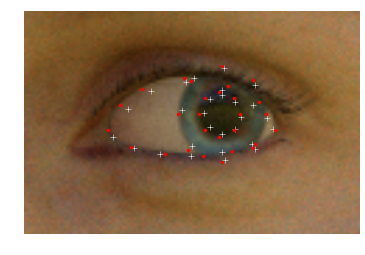

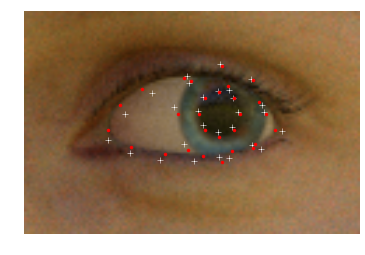

In [32]:
i = np.random.choice(num_samples)
plot_2d_landmarks(images_test[i,:,:,:], ldmks_2d_test[i,:,:], pred_landmarks_2[i,:,:])
plot_2d_landmarks(images_test[i,:,:,:], ldmks_2d_test[i,:,:], pred_landmarks_3[i,:,:])